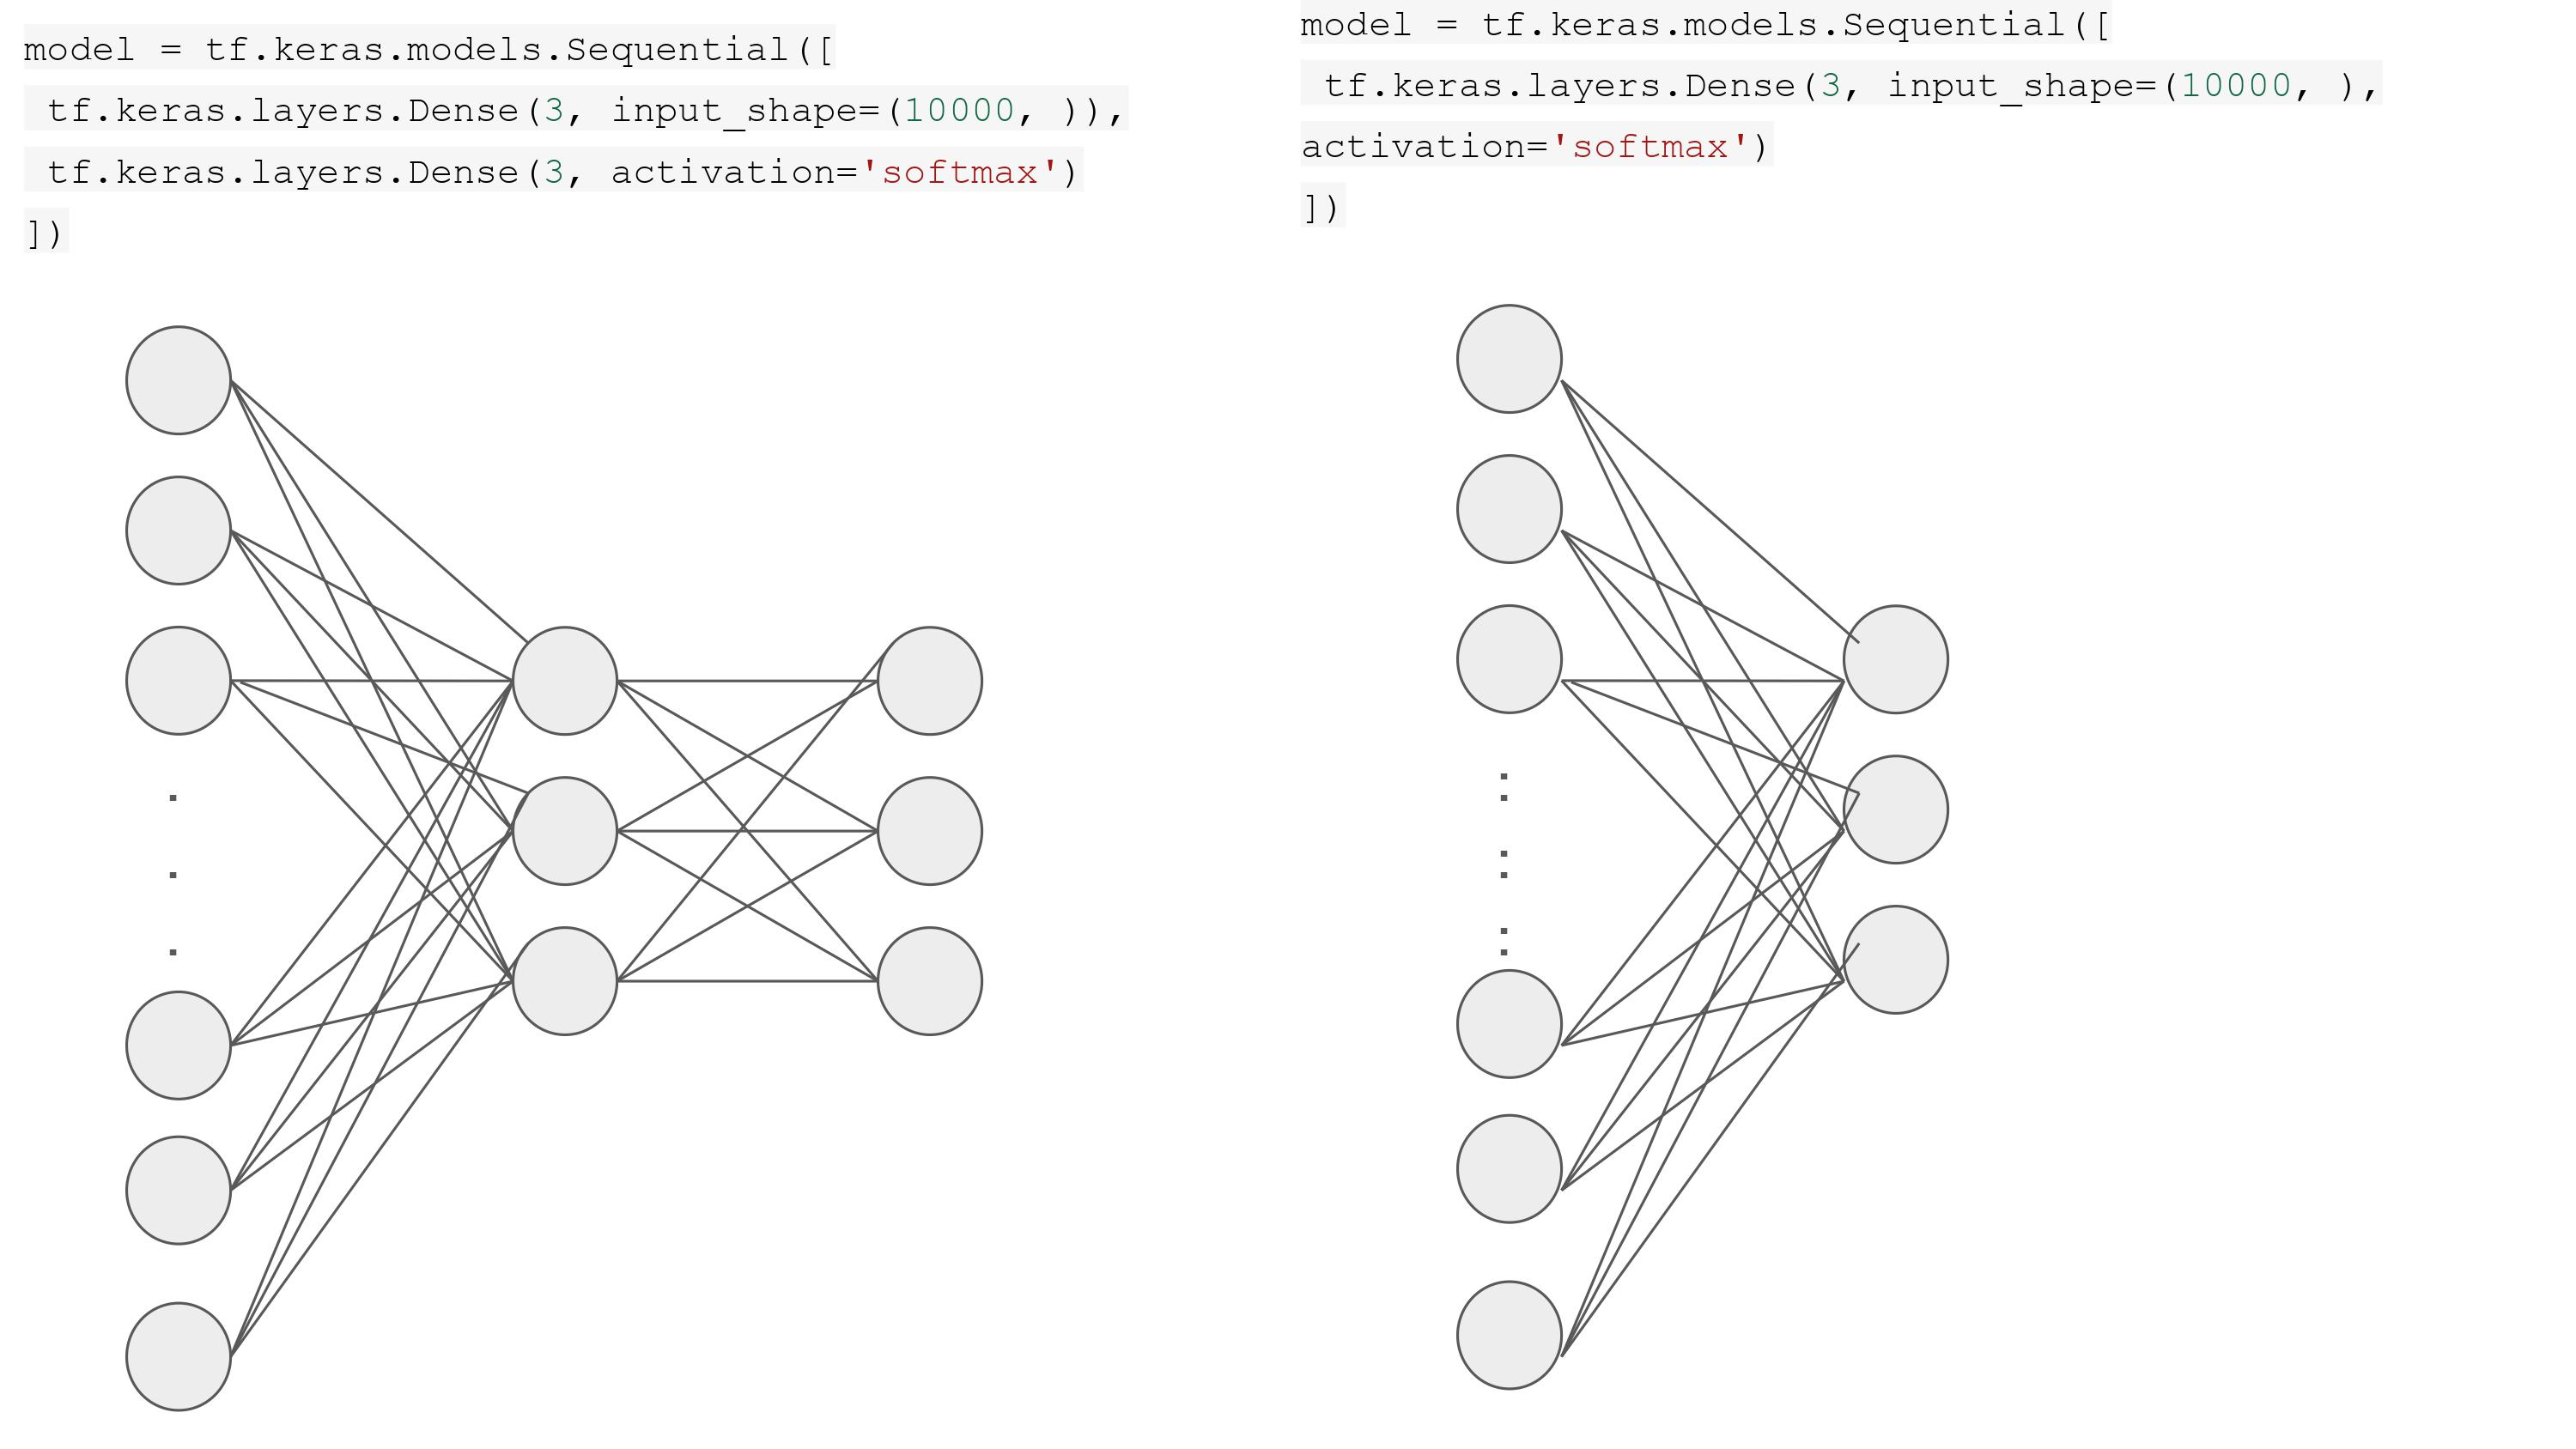

## Preprocessing the dataset for regression
1. Standardization : Change data into the distribution with mean 0 and std1

$$x_{new} = \frac{x-mean(X)}{SD(x)}$$

2. Min-Max normalization : change date with max 1 and min 0

$$x_{new} = \frac{x-min(X)}{max(X)-min(X)}$$


2025.1.15
1. Try with three node

2. Try Eq.(11)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import tensorflow as tf
import os
# import  imageio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from keras.utils import to_categorical #For keras > 2.0
# import cv2
import scipy.io
from sklearn.model_selection import train_test_split
from keras import initializers
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


In [ ]:
# mat = scipy.io.loadmat('EQ13_data.mat')
mat = scipy.io.loadmat('drive/MyDrive/Quantum_reservoir_processing/case2_3nodes.mat')
n1 = mat['n1_selected']
n2 = mat['n2_selected']
n3 = mat['n3_selected']
g2 = mat['g2']


# Normalization with each sample or whole sample

# 3 nodes and pick more points

In [ ]:
len(n1[0][0][0])
# n1[0][0]

20

In [ ]:
g2_re = []
ns = []
number = 1000
r = np.arange(0, 1, 0.001)
for i in range(number):
# for i in range(np.shape(n1)[1]):
    input = np.concatenate((np.reshape(n1[0][i],len(n1[0][0][0])), np.reshape(n2[0][i],len(n2[0][0][0])),  np.reshape(n3[0][i],len(n3[0][0][0]))) )
    # input = input/sum(input)
    ns.append(input)
    g2_re.append({g2[0][i]:r[i]})
    # g2_re.append(g2[0][i])


In [ ]:
g2_re

[{0.0: 0.0},
 {8.9999640001274e-06: 0.001},
 {3.599942400815351e-05: 0.002},
 {8.09970840928718e-05: 0.003},
 {0.00014399078452180286: 0.004},
 {0.00022497750199046047: 0.005},
 {0.0003239533499432663: 0.006},
 {0.00044091357898605184: 0.007},
 {0.0005758525773900705: 0.008},
 {0.0007287638716874324: 0.009000000000000001},
 {0.0008996401273578369: 0.01},
 {0.0010884731496064958: 0.011},
 {0.0012952538842330916: 0.012},
 {0.0015199724185916011: 0.013000000000000001},
 {0.0017626179826408276: 0.014},
 {0.0020231789500854427: 0.015},
 {0.002301642839607296: 0.016},
 {0.002597996316186812: 0.017},
 {0.002912225192514212: 0.018000000000000002},
 {0.0032443144304902575: 0.019},
 {0.0035942481428163486: 0.02},
 {0.0039620095946735195: 0.021},
 {0.004347581205490204: 0.022},
 {0.004750944550798299: 0.023},
 {0.005172080364177269: 0.024},
 {0.005610968539285865: 0.025},
 {0.006067588131981205: 0.026000000000000002},
 {0.00654191736252466: 0.027},
 {0.007033933617874293: 0.028},
 {0.007543613454

In [ ]:
X = np.array(ns)
# Y = np.reshape(g2_re,(number,1))
Y = g2_re
# X, Y = shuffle(X,Y)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)
X_train, X_val, Y_train, Y_val = train_test_split(X_train,Y_train, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
Y_test[0].items()

dict_items([(0.7602821189570136, 0.362)])

In [ ]:
Y_train_g2 = []
Y_train_r = []

Y_val_g2 = []
Y_val_r = []

Y_test_g2 = []
Y_test_r = []

for ele in Y_train:
  key = list(ele.keys())
  value = list(ele.values())
  Y_train_g2.append(key)
  Y_train_r.append(value[0])
Y_train_g2 = np.reshape(Y_train_g2,(len(Y_train_g2),1))

for ele in Y_val:
  key = list(ele.keys())
  value = list(ele.values())
  Y_val_g2.append(key[0])
  Y_val_r.append(value[0])
Y_val_g2 = np.reshape(Y_val_g2,(len(Y_val_g2),1))

for ele in Y_test:
  key = list(ele.keys())
  value = list(ele.values())
  Y_test_g2.append(key[0])
  Y_test_r.append(value[0])
Y_test_g2 = np.reshape(Y_test_g2,(len(Y_test_g2),1))

In [ ]:
model = tf.keras.models.Sequential([
  # tf.keras.layers.Dense(3, input_shape=(10000, )),
  # tf.keras.layers.Dense(64, activation='relu'),
  # tf.keras.layers.Dense(2, input_shape=(8, ))
  tf.keras.layers.Dense(8, input_shape=(len(n1[0][0][0])*3, )),
  # tf.keras.layers.Dense(16, activation='relu'),
  # tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1)
])

model.summary()

optim = tf.keras.optimizers.Adam(learning_rate=0.0001)
# model.compile(optimizer=optim,
#               loss='mse',
#               metrics=['mae'])
model.compile(optimizer=optim,
              loss='mse'
              )

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 8)                   │             488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 497 (1.94 KB)

 Trainable params: 497 (1.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
len(Y_train_g2)

640

In [ ]:
# checkpoint_path = "cp.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)

# history = model.fit(X_train, Y_train, validation_data=[X_test, Y_test], batch_size=20, epochs=500, callbacks=[cp_callback])
# model.fit(X_train, Y_train, validation_data=[X_test, Y_test], batch_size=200, epochs=200)
history = model.fit(X_train, Y_train_g2, validation_data=[X_val, Y_val_g2], batch_size=16, epochs=1000)

Epoch 1/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8535 - val_loss: 1.9289
Epoch 2/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5618 - val_loss: 1.1809
Epoch 3/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0297 - val_loss: 0.9254
Epoch 4/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8985 - val_loss: 0.8366
Epoch 5/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8027 - val_loss: 0.7975
Epoch 6/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8066 - val_loss: 0.7736
Epoch 7/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7860 - val_loss: 0.7463
Epoch 8/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7630 - val_loss: 0.7239
Epoch 9/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7497 - val_loss: 0.6997
Epoch 10/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7097 - val_loss: 0.6812
Epoch 11/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6972 - val_loss: 0.6561
Epoch 12/1000
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

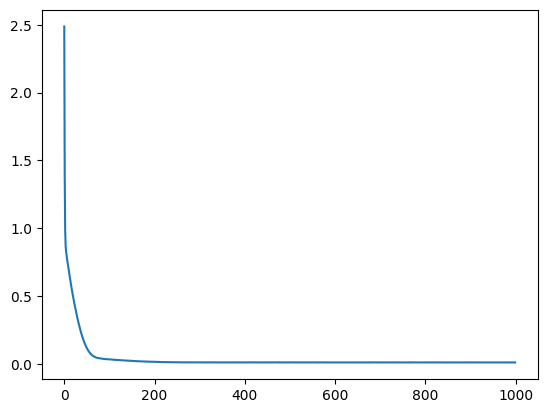

In [ ]:
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])

In [ ]:
Y_predict = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train_g2)

# 테스트 결과 예측
Y_predict_linear_regression = regressor.predict(X_test)
# 출처: https://giveme-happyending.tistory.com/185 [소연의_개발일지:티스토리]

0.0123619920568088


Text(0, 0.5, 's_predict')

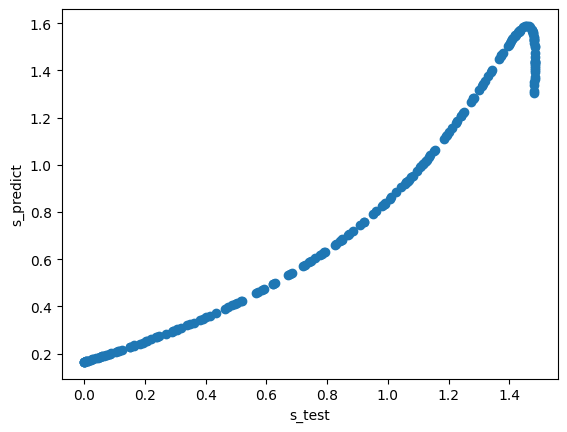

In [ ]:
error = mean_squared_error(Y_test_g2,Y_predict)
print(error)
plt.scatter(Y_test_g2[:,0], Y_predict[:,0])
# plt.ylim([0, 0.7])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')


Text(0.5, 1.0, '3 nodes')

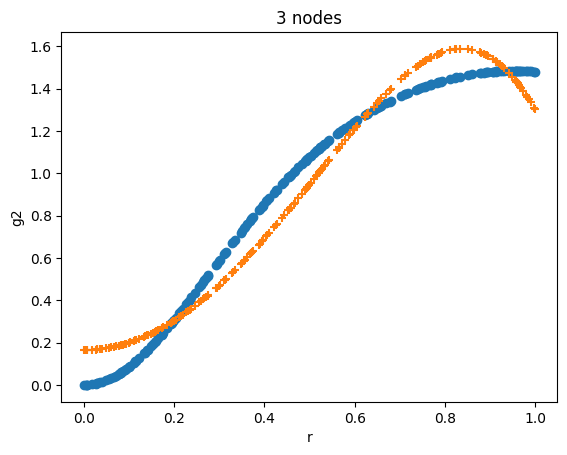

In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_predict[0:3]

array([[1.3997811],
       [1.4509088],
       [1.1400539]], dtype=float32)

In [ ]:
Y_test_g2[0:3]

array([[1.40417956],
       [1.45318543],
       [1.13874768]])

Text(0, 0.5, 's_predict')

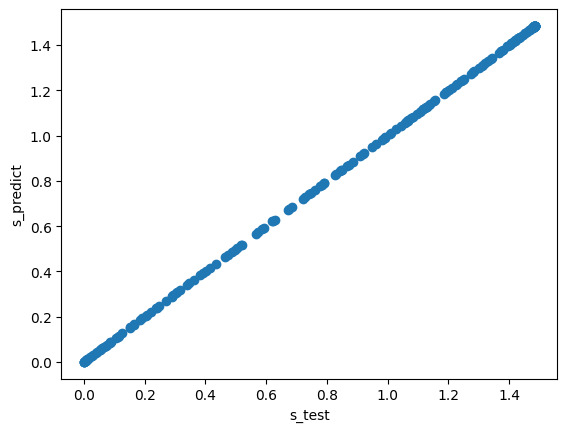

In [ ]:
# plt.subplot(2,1,1)
plt.scatter(Y_test_g2[:,0], Y_predict_linear_regression[:,0])
# plt.ylim([0.7, 0.9])
# plt.xlim([0.7, 0.9])
plt.xlabel('s_test')
plt.ylabel('s_predict')
# plt.subplot(2,1,2)


Text(0.5, 1.0, '3 nodes')

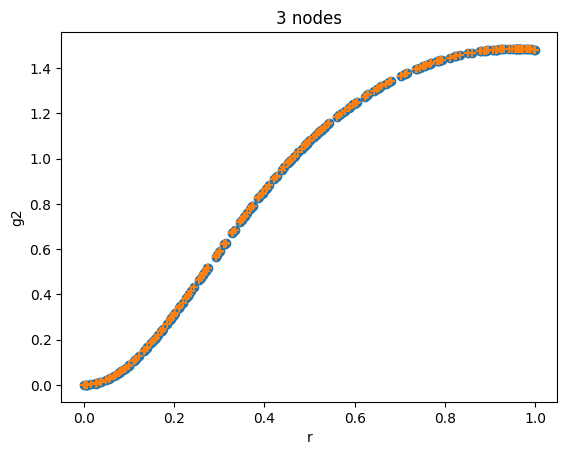

In [ ]:
plt.scatter(Y_test_r, Y_test_g2[:,0])
plt.scatter(Y_test_r, Y_predict_linear_regression[:,0],marker="+")
plt.xlabel('r')
plt.ylabel('g2')
plt.title('3 nodes')

In [ ]:
Y_test

array([[1.3657449 , 0.72480105],
       [0.88661569, 0.88740816],
       [6.20486916, 5.3590614 ],
       [0.82318468, 0.89285348],
       [0.90948839, 3.2148959 ],
       [0.73824396, 0.85195015],
       [4.582803  , 0.95297262],
       [0.70370536, 0.88663819],
       [0.73930391, 0.83871482],
       [0.82068116, 0.83352823],
       [0.80073825, 0.79574036],
       [0.50738605, 0.43914094],
       [3.4459187 , 2.46818196],
       [0.81798848, 0.84907697],
       [0.55853134, 4.93295755],
       [0.73498707, 0.77118091],
       [0.89178885, 0.81910396],
       [0.84299569, 0.74371575],
       [0.77008721, 0.75403768],
       [5.40386751, 5.00587227],
       [0.87982348, 0.82969598],
       [0.80196238, 0.70389569],
       [0.53981852, 2.0701035 ],
       [0.8713874 , 0.87816948],
       [0.86662167, 0.85404955],
       [1.11502837, 5.05980824],
       [1.43336145, 2.76823635],
       [0.81955564, 0.84412045],
       [0.89709552, 0.86852969],
       [0.76458307, 0.70502892],
       [2.